# Mean/variance image normalization

Sometimes it's necessary to set certain values to the statistical moments of pixel values. When we set $\theta$ for mean value of values and $1$ for variance, the operation is called normalization. This can be useful in computer vision algorithms for dealing with values with a certain range and with certain statistics. Here we're going to check out image normalization.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print(header)
    print('  Shape:', np_arr.shape, '  Data type:', np_arr.dtype)
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                 print("]")
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            if i == end_First-1:
                print(']  {}:'.format(name), np_arr.dtype)
            else:
                print("]")

def plt_view_image(plt,list_images):
    #%pylab inline
    plt.figure(figsize=(15,6))
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis('off')
        plt.title(name)
        plt.imshow(img,cmap='gray' )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S02\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s02\env

d:\html_doc\program\opencv\packt\s02\env\lib\site-packages
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s02\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


image
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] ]  image: float32
image_mean
  Shape: (512, 512, 3)   Data type: float32
[ [-0.01266041  0.03439844  0.38341802] [-0.01266041  0.03439844  0.38341802] [0.01871216 0.03439844 0.37165332] ]  image_mean: float32


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image[x,y,[0]]: [108366.68]
mean[0] = [0.41338608]
[0.07681]
mean[0,1,2] = [0.5028395]
[[[-0.01264343  0.03441542  0.383435  ]
  [-0.01264343  0.03441542  0.383435  ]
  [ 0.01872915  0.03441542  0.3716703 ]
  [-0.00087869  0.03049386  0.3716703 ]
  [-0.03225127  0.03833699  0.383435  ]
  [-0.04793754  0.00304288  0.383435  ]
  [-0.02048656  0.03833699  0.39127815]]]


<Figure size 432x432 with 0 Axes>

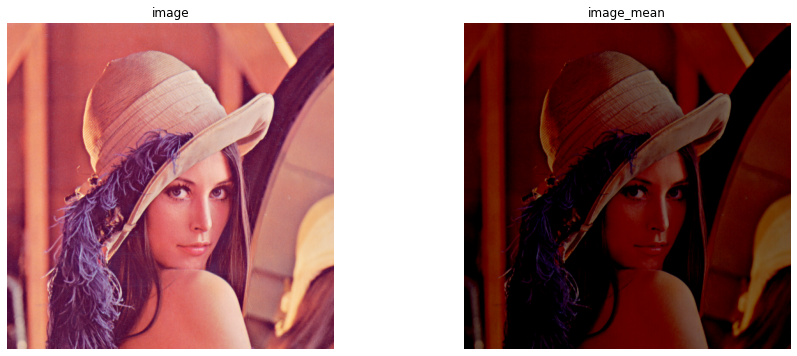

In [2]:
image = cv2.imread('../data/Lena.png').astype(np.float32) / 255

image_mean = np.copy(image)
image_mean -= image_mean.mean()

################################################
print_image('image', 'image',  image,0,1,0,3)
print_image('image_mean','image_mean',image_mean,0,1,0,3)

sum_0 = 0.
sum_012 = 0.
count = 0
for x in range(image.shape[0]):
    for y in range(image.shape[1]):
        #print(image[x,y,[0]])
        sum_0 +=image[x,y,[0]]
        sum_012 +=image[x,y,[0]]
        sum_012 +=image[x,y,[1]]
        sum_012 +=image[x,y,[2]]
        count +=1
        #if count>5:
        #    break
#    break
print("image[x,y,[0]]:",sum_0)
mean_0 = sum_0/image.shape[0]/image.shape[1]
print("mean[0] =", mean_0)
print(image[0,0,[0]]-mean_0)   
mean_012 = sum_012/image.shape[0]/image.shape[1]/image.shape[2]
print("mean[0,1,2] =", mean_012)
print(image[:1,:7]-mean_012)
        
plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_mean",image_mean[:,:,[2,1,0]]]  
                   ])
cv2.imshow('image -> image_mean', np.hstack([image,image_mean]))
cv2.waitKey()
cv2.destroyAllWindows()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


image
  Shape: (512, 512, 3)   Data type: float32
[ [0.49019608 0.5372549  0.8862745 ] [0.49019608 0.5372549  0.8862745 ] [0.52156866 0.5372549  0.8745098 ] ]  image: float32
image_mean
  Shape: (512, 512, 3)   Data type: float32
[ [-0.01266041  0.03439844  0.38341802] [-0.01266041  0.03439844  0.38341802] [0.01871216 0.03439844 0.37165332] ]  image_mean: float32
image_std
  Shape: (512, 512, 3)   Data type: float32
[ [-0.05473384  0.14871223  1.657603  ] [-0.05473384  0.14871223  1.657603  ] [0.08089692 0.14871223 1.6067415 ] ]  image_std: float32


<Figure size 432x432 with 0 Axes>

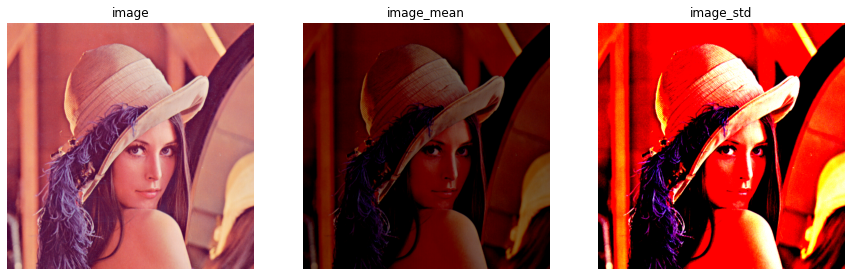

In [3]:
image_std = np.copy(image)
image_std -= image_std.mean()
image_std /= image_std.std()


################################################
print_image('image', 'image',  image,0,1,0,3)
print_image('image_mean','image_mean',image_mean,0,1,0,3)
print_image('image_std', 'image_std', image_std,0,1,0,3)

plt.figure(figsize=(6,6))
plt_view_image(plt,[["image",image[:,:,[2,1,0]]],
                    ["image_mean",image_mean[:,:,[2,1,0]]],
                    ["image_std",image_std[:,:,[2,1,0]]]
                   ])

cv2.imshow('image -> image_mean - > image_std', np.hstack([image,image_mean,image_std]))
cv2.waitKey()
cv2.destroyAllWindows()